# liNEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
%matplotlib inline

In [2]:
# read training data into a dataframe
df = pd.read_csv('DC_Properties.csv')

C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Show the first two rows of dataframe
df.head(2)

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [4]:
# Some statistical information about the data
df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


In [5]:
df['INTWALL'].unique()

array(['Hardwood', 'Wood Floor', 'Hardwood/Carp', 'Carpet', 'Lt Concrete',
       'Vinyl Comp', 'Ceramic Tile', 'Default', 'Terrazo', 'Parquet',
       'Vinyl Sheet', 'Resiliant', nan], dtype=object)

In [6]:
# Checking if there are missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
Unnamed: 0            158957 non-null int64
BATHRM                158957 non-null int64
HF_BATHRM             158957 non-null int64
HEAT                  158957 non-null object
AC                    158957 non-null object
NUM_UNITS             106696 non-null float64
ROOMS                 158957 non-null int64
BEDRM                 158957 non-null int64
AYB                   158686 non-null float64
YR_RMDL               80928 non-null float64
EYB                   158957 non-null int64
STORIES               106652 non-null float64
SALEDATE              132187 non-null object
PRICE                 98216 non-null float64
QUALIFIED             158957 non-null object
SALE_NUM              158957 non-null int64
GBA                   106696 non-null float64
BLDG_NUM              158957 non-null int64
STYLE                 106696 non-null object
STRUCT                106696 non-null 

# histogram of each column 

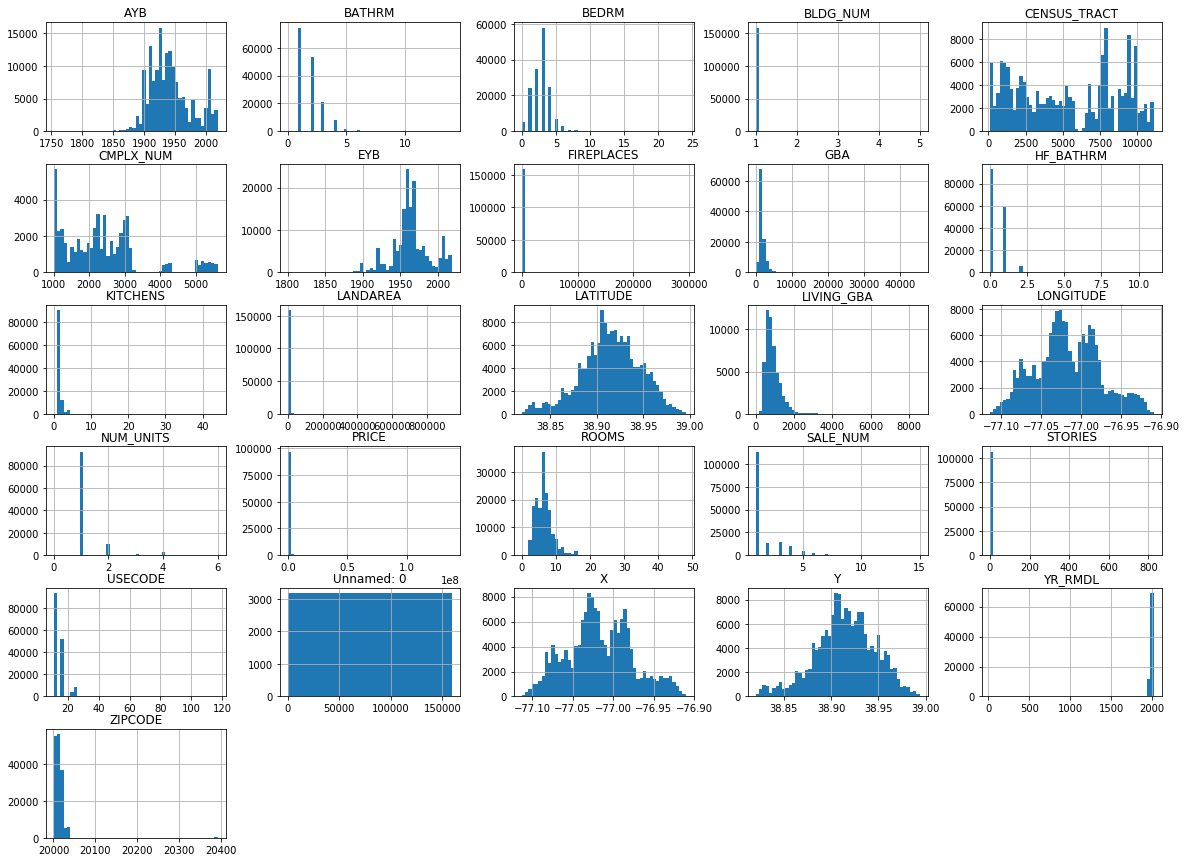

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024100C934A8>]],
      dtype=object)

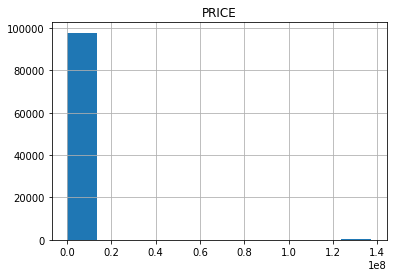

In [8]:
#plt.figure(figsize=(15,15))
df.hist(column='PRICE', bins=10)

In [9]:
# Delete non-Residential in Source column 

In [10]:

df= df[df.SOURCE == 'Residential']

In [11]:
# Checking if there are missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106696 entries, 0 to 106695
Data columns (total 49 columns):
Unnamed: 0            106696 non-null int64
BATHRM                106696 non-null int64
HF_BATHRM             106696 non-null int64
HEAT                  106696 non-null object
AC                    106696 non-null object
NUM_UNITS             106696 non-null float64
ROOMS                 106696 non-null int64
BEDRM                 106696 non-null int64
AYB                   106455 non-null float64
YR_RMDL               49279 non-null float64
EYB                   106696 non-null int64
STORIES               106652 non-null float64
SALEDATE              84183 non-null object
PRICE                 57900 non-null float64
QUALIFIED             106696 non-null object
SALE_NUM              106696 non-null int64
GBA                   106696 non-null float64
BLDG_NUM              106696 non-null int64
STYLE                 106696 non-null object
STRUCT                106696 non-null o

In [12]:
# delete CMPLX_NUM and LIVING_GBA because they have 0 value

In [13]:
df.drop(['CMPLX_NUM','LIVING_GBA'],axis=1,inplace=True)


In [14]:
#df.drop('SALEDATE',axis=1,inplace=True)

In [15]:
# Drop all nan row based on price 

In [16]:
df=df.dropna(subset=['PRICE'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57900 entries, 0 to 106695
Data columns (total 47 columns):
Unnamed: 0            57900 non-null int64
BATHRM                57900 non-null int64
HF_BATHRM             57900 non-null int64
HEAT                  57900 non-null object
AC                    57900 non-null object
NUM_UNITS             57900 non-null float64
ROOMS                 57900 non-null int64
BEDRM                 57900 non-null int64
AYB                   57805 non-null float64
YR_RMDL               33217 non-null float64
EYB                   57900 non-null int64
STORIES               57867 non-null float64
SALEDATE              57899 non-null object
PRICE                 57900 non-null float64
QUALIFIED             57900 non-null object
SALE_NUM              57900 non-null int64
GBA                   57900 non-null float64
BLDG_NUM              57900 non-null int64
STYLE                 57900 non-null object
STRUCT                57900 non-null object
GRADE       

In [18]:
# Drop X and Y because they are similar LATITUDE and LONGITUDE 

In [19]:
df.drop(['X','Y'],axis=1,inplace=True)

In [20]:
# Drop source because we have only one type now

In [21]:
df.drop(['SOURCE'],axis=1,inplace=True)

In [22]:
print(df.isnull().sum())


Unnamed: 0                0
BATHRM                    0
HF_BATHRM                 0
HEAT                      0
AC                        0
NUM_UNITS                 0
ROOMS                     0
BEDRM                     0
AYB                      95
YR_RMDL               24683
EYB                       0
STORIES                  33
SALEDATE                  1
PRICE                     0
QUALIFIED                 0
SALE_NUM                  0
GBA                       0
BLDG_NUM                  0
STYLE                     0
STRUCT                    0
GRADE                     0
CNDTN                     0
EXTWALL                   0
ROOF                      0
INTWALL                   0
KITCHENS                  1
FIREPLACES                0
USECODE                   0
LANDAREA                  0
GIS_LAST_MOD_DTTM         0
FULLADDRESS             335
CITY                    331
STATE                   331
ZIPCODE                   0
NATIONALGRID            331
LATITUDE            

In [23]:
# Drop Unnamed: 0  because it work as index and we have an new index for the data and Yr_RMDL BECAUSE IT need a lot of data 

In [24]:
df.drop(['Unnamed: 0','YR_RMDL'],axis=1,inplace=True)

In [25]:
# drop the one raw missing from saledate and kitchens

In [26]:
df=df.dropna(subset=['KITCHENS','SALEDATE'])

In [27]:
df= df[df.PRICE >= 1000]
df= df[df.BATHRM > 0]

In [28]:
print(df.isnull().sum())

BATHRM                   0
HF_BATHRM                0
HEAT                     0
AC                       0
NUM_UNITS                0
ROOMS                    0
BEDRM                    0
AYB                     92
EYB                      0
STORIES                 33
SALEDATE                 0
PRICE                    0
QUALIFIED                0
SALE_NUM                 0
GBA                      0
BLDG_NUM                 0
STYLE                    0
STRUCT                   0
GRADE                    0
CNDTN                    0
EXTWALL                  0
ROOF                     0
INTWALL                  0
KITCHENS                 0
FIREPLACES               0
USECODE                  0
LANDAREA                 0
GIS_LAST_MOD_DTTM        0
FULLADDRESS            333
CITY                   329
STATE                  329
ZIPCODE                  0
NATIONALGRID           329
LATITUDE                 0
LONGITUDE                0
ASSESSMENT_NBHD          0
ASSESSMENT_SUBNBHD    8003
C

In [29]:
df=df.dropna(subset=['CITY','STATE','CENSUS_BLOCK','CENSUS_BLOCK','AYB','STORIES','FULLADDRESS','QUADRANT'])

In [30]:
df.drop(['FULLADDRESS','CITY','STATE','ASSESSMENT_SUBNBHD','NATIONALGRID'],axis=1,inplace=True)

In [31]:
df["SALEDATE"] = df["SALEDATE"].apply(lambda x: str(x)[0:4])

In [32]:
int_col = ['SALEDATE']
#con_col = ['BATHRM','HF_BATHRM','NUM_UNITS','ROOMS','BEDRM','EYB','STORIES','SALE_NUM','KITCHENS','FIREPLACES','LANDAREA']

for i in int_col:
    df[i] = df[i].astype('int64')

In [33]:
df['QUADRANT'].unique()

array(['NW', 'SW', 'SE', 'NE'], dtype=object)

In [34]:
z = (['SQUARE','CENSUS_BLOCK','QUADRANT'])
for k in range(len(z)):
    r = df[z[k]].unique()
    for g in range(len(r)):
        df = df.replace({z[k]: r[g]}, g)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57297 entries, 0 to 106695
Data columns (total 37 columns):
BATHRM               57297 non-null int64
HF_BATHRM            57297 non-null int64
HEAT                 57297 non-null object
AC                   57297 non-null object
NUM_UNITS            57297 non-null float64
ROOMS                57297 non-null int64
BEDRM                57297 non-null int64
AYB                  57297 non-null float64
EYB                  57297 non-null int64
STORIES              57297 non-null float64
SALEDATE             57297 non-null int64
PRICE                57297 non-null float64
QUALIFIED            57297 non-null object
SALE_NUM             57297 non-null int64
GBA                  57297 non-null float64
BLDG_NUM             57297 non-null int64
STYLE                57297 non-null object
STRUCT               57297 non-null object
GRADE                57297 non-null object
CNDTN                57297 non-null object
EXTWALL              57297 non-nu

In [36]:
df4=df.copy()

In [37]:
HEAT = pd.get_dummies(df4['HEAT'],drop_first=True)
ASSESSMENT_NBHD = pd.get_dummies(df4['ASSESSMENT_NBHD'],drop_first=True)
WARD = pd.get_dummies(df4['WARD'],drop_first=True)
AC = pd.get_dummies(df4['AC'],drop_first=True)
QUALIFIED = pd.get_dummies(df4['QUALIFIED'],drop_first=True)
STYLE = pd.get_dummies(df4['STYLE'],drop_first=True)
STRUCT = pd.get_dummies(df4['STRUCT'],drop_first=True)
GRADE = pd.get_dummies(df4['GRADE'],drop_first=True)
CNDTN = pd.get_dummies(df4['CNDTN'],drop_first=True)
EXTWALL = pd.get_dummies(df4['EXTWALL'],drop_first=True)
ROOF = pd.get_dummies(df4['ROOF'],drop_first=True)
INTWALL = pd.get_dummies(df4['INTWALL'],drop_first=True)
#QUADRANT = pd.get_dummies(df['QUADRANT'],drop_first=True)
#CENSUS_BLOCK = pd.get_dummies(df['CENSUS_BLOCK'],drop_first=True)

In [38]:
df4.drop(['HEAT','ASSESSMENT_NBHD','WARD','AC','QUALIFIED','STYLE','STRUCT','GRADE','CNDTN','EXTWALL','ROOF','INTWALL','GIS_LAST_MOD_DTTM'],axis=1,inplace=True)

In [39]:
df4.head(2)

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,EYB,STORIES,SALEDATE,PRICE,...,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,CENSUS_BLOCK,SQUARE,QUADRANT
0,4,0,2.0,8,4,1910.0,1972,3.0,2003,1095000.0,...,5,24,1680,20009.0,38.914680,-77.040832,4201.0,0,0,0
2,3,1,2.0,9,5,1910.0,1984,3.0,2016,2100000.0,...,4,24,1680,20009.0,38.914684,-77.040678,4201.0,0,0,0


In [40]:
df1 = pd.concat([df4,HEAT,ASSESSMENT_NBHD,WARD,AC,QUALIFIED,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL],axis=1)

In [41]:
df1.head(2)

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,EYB,STORIES,SALEDATE,PRICE,...,Default,Hardwood,Hardwood/Carp,Lt Concrete,Parquet,Resiliant,Terrazo,Vinyl Comp,Vinyl Sheet,Wood Floor
0,4,0,2.0,8,4,1910.0,1972,3.0,2003,1095000.0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,2.0,9,5,1910.0,1984,3.0,2016,2100000.0,...,0,1,0,0,0,0,0,0,0,0


In [42]:
X = df1.drop('PRICE',axis=1)
y = df1['PRICE']

In [43]:
df2=df1.copy()

In [44]:
df2['PRICE'].size

57297

In [45]:
value= df2['PRICE'].values.copy()

In [46]:
value.sort()

In [47]:
break_point=0
break_point1=value[5734]
break_point2=value[5734*2]
break_point3=value[5734*3]
break_point4=value[5734*4]
break_point5=value[5734*5]
break_point6=value[5734*6]
break_point7=value[5734*7]
break_point8=value[5734*8]
break_point9=value[5734*9]
break_point10=[26100000]

In [48]:
for i in range(len(y)):
    if (y.iloc[i] <= break_point1):
        y.iloc[i] = 0
        print('0')
    elif ((y.iloc[i] > break_point1) & (y.iloc[i] <= break_point2)):
        y.iloc[i] = 1
        print('1')
    elif ((y.iloc[i] > break_point2) & (y.iloc[i] <= break_point3)):
        y.iloc[i] = 2
        print('2')
    elif ((y.iloc[i] > break_point3) & (y.iloc[i] <= break_point4)):
        y.iloc[i] = 3
        print('3')
    elif ((y.iloc[i] > break_point4) & (y.iloc[i] <= break_point5)):
        y.iloc[i] = 4
        print('4')
    elif ((y.iloc[i] > break_point5) & (y.iloc[i] <= break_point6)):
        y.iloc[i] = 5
        print('5')
    elif ((y.iloc[i] > break_point6) & (y.iloc[i] <= break_point7)):
        y.iloc[i] = 6
        print('6')
    elif ((y.iloc[i] > break_point7) & (y.iloc[i] <= break_point8)):
        y.iloc[i] = 7
        print('7')
    elif ((y.iloc[i] > break_point8) & (y.iloc[i] <= break_point9)):
        y.iloc[i] = 8
        print('8')
    else:
        y.iloc[i] = 9
        print('9')

8
9
9
9
8
9
9
9
6
0
8
8
8
0
7
9
1
3
8
9
9
9
9
5
8
3
8
9
4
7
5
2
6
9
4
9
9
5
8
6
8
7
8
2
9
9
9
8
9
8
9
9
4
9
7
9
9
7
9
9
9
9
9
9
9
9
9
9
9
9
9
9
8
8
9
3
7
9
9
2
8
9
8
9
8
7
8
7
8
8
9
9
1
6
6
8
6
6
3
3
8
9
0
8
7
7
7
8
2
1
5
9
9
3
4
9
9
5
9
9
9
8
8
9
6
8
1
5
8
9
8
8
2
8
8
8
2
9
9
9
9
9
9
9
9
5
9
3
4
3
6
2
4
8
5
5
6
5
8
2
5
7
5
8
6
2
6
0
8
6
8
8
4
5
9
3
7
7
6
7
7
7
2
7
8
5
3
7
7
7
8
7
9
1
6
1
6
2
1
7
8
7
8
7
3
8
4
9
9
9
9
3
9
9
4
9
9
9
9
9
8
3
9
6
5
6
7
8
9
8
3
4
7
8
8
5
7
8
8
6
7
8
6
3
9
9
7
9
7
2
0
9
9
9
7
7
0
2
6
6
1
5
8
8
8
5
9
9
6
8
8
6
6
6
6
6
6
7
7
9
1
9
8
7
1
9
9
8
2
5
7
4
6
9
9
7
3
9
8
9
4
3
9
3
9
9
8
8
2
6
8
9
9
9
8
9
9
9
9
8
9
9
9
8
5
3
5
4
6
9
6
7
6
6
5
1
1
5
9
8
7
7
7
7
8
6
2
8
9
6
7
5
0
8
9
9
6
8
2
4
9
8
0
9
8
7
6
9
9
8
9
2
8
9
8
8
7
5
8
9
5
0
2
9
7
9
8
1
9
9
4
3
7
9
8
7
9
7
9
9
9
9
6
9
9
9
8
7
2
9
9
9
2
9
9
9
9
8
9
9
8
9
5
9
7
9
6
4
9
9
9
5
4
4
9
9
7
8
9
2
9
3
9
9
7
8
9
7
9
2
9
9
9
9
8
9
9
7
1
7
9
9
8
6
9
9
9
0
9
9
9
9
9
9
3
9
9
9
9
2
7
2
6
7
3
7
8
7
6
6
7
7
8
3
6
8
9
7
8
8


9
9
7
9
8
9
7
9
8
9
9
9
8
9
8
9
9
8
9
8
4
6
8
8
1
7
8
5
1
6
0
5
8
8
8
7
4
7
7
2
8
7
9
9
8
9
3
5
9
9
8
9
3
7
5
6
4
5
7
7
6
6
9
4
8
0
4
4
8
8
8
3
9
7
9
4
6
6
6
7
6
1
8
5
7
6
0
6
7
6
6
4
6
0
8
6
3
4
5
6
6
2
1
2
4
4
6
3
5
1
4
4
5
5
3
6
6
9
7
8
8
0
6
5
6
4
4
9
3
8
9
9
9
0
1
2
6
4
0
4
0
0
8
3
2
0
5
5
6
8
0
4
0
0
2
0
0
8
3
6
8
5
2
0
7
1
5
0
0
9
6
5
4
7
6
6
8
7
3
7
7
6
9
9
7
7
8
8
5
3
4
8
5
2
4
7
8
8
8
6
6
7
2
8
8
8
8
7
8
8
8
8
8
8
8
5
7
8
6
3
5
9
3
2
8
7
8
9
2
1
8
1
8
7
1
8
5
9
1
6
7
6
8
7
7
6
8
2
6
2
8
6
2
6
6
8
4
0
7
5
9
6
2
2
7
3
3
6
5
8
7
6
6
6
4
8
1
3
9
9
7
9
9
9
8
8
1
8
7
8
6
7
6
0
2
4
1
5
4
7
7
7
6
7
6
6
0
1
5
7
4
7
6
9
9
9
9
3
9
4
8
9
9
9
8
4
0
5
1
7
6
7
5
4
8
2
6
4
2
0
9
7
6
1
6
8
4
5
2
1
2
8
7
8
8
8
9
3
6
6
4
6
5
6
6
7
5
9
8
8
3
8
8
8
5
4
9
9
3
6
9
9
9
8
4
4
6
8
8
6
8
7
6
3
1
6
4
0
7
6
3
7
4
1
4
4
0
6
7
5
8
8
0
4
6
3
6
6
5
4
4
4
5
1
4
9
6
6
6
5
5
2
4
6
2
7
4
4
2
7
9
9
9
6
0
3
3
8
9
8
6
8
4
7
9
4
5
9
5
7
6
7
5
5
6
6
5
6
6
6
7
6
0
5
4
5
6
8
8
7
6
6
4
5
6
4
0
5
0
4
6
8
5
6
7
5
7
6
6
8


6
7
2
4
4
3
7
1
4
7
4
8
0
5
3
5
4
7
0
1
6
6
6
9
5
9
8
7
8
7
5
4
6
7
5
7
3
2
1
0
6
5
3
5
3
4
7
6
6
8
6
8
7
7
1
0
1
5
5
2
6
4
7
6
3
7
7
7
5
0
0
4
1
9
0
4
7
9
5
4
6
0
7
6
7
8
7
6
1
2
7
7
3
8
6
3
5
5
6
5
5
0
2
3
5
2
3
4
3
5
4
4
0
5
6
7
0
5
6
0
5
5
8
7
5
6
7
9
7
7
0
7
0
6
6
1
6
5
0
0
6
6
6
5
8
9
9
1
2
3
4
8
2
2
4
6
2
3
4
2
9
8
5
1
1
8
9
9
8
4
8
7
7
9
9
8
2
2
7
6
4
6
7
6
5
6
6
5
4
7
5
9
5
9
8
8
7
7
1
8
5
2
6
4
8
5
7
7
6
6
7
5
7
8
8
5
7
5
2
5
6
8
8
6
0
5
8
6
7
4
6
4
7
7
2
8
8
8
2
3
8
6
7
2
3
7
8
9
7
8
6
7
6
8
7
8
7
9
9
1
2
7
1
6
1
6
5
5
5
5
7
1
0
7
5
4
5
1
7
7
7
5
1
4
2
1
5
7
7
6
1
2
7
5
3
6
4
6
2
6
4
7
2
4
7
4
7
7
7
5
5
8
5
8
7
4
6
7
6
1
8
1
7
6
8
7
6
3
9
6
7
8
7
6
7
3
1
1
5
6
0
4
4
3
4
6
0
1
5
0
6
6
8
8
5
5
7
8
8
8
7
6
1
0
7
6
5
1
1
8
0
4
6
4
4
3
4
6
4
6
5
1
3
1
3
2
0
3
8
7
3
7
1
0
3
8
1
6
4
8
6
7
6
6
6
5
6
0
6
6
0
1
7
1
8
1
2
1
4
5
4
3
1
3
3
2
7
4
6
7
4
6
8
6
3
8
8
3
9
6
2
8
2
8
8
6
8
5
6
6
6
7
4
3
7
6
9
7
6
8
5
8
6
5
6
5
6
9
8
6
7
3
3
5
6
6
6
0
6
6
7
6
5
7
5
6
3
3
4
0
3
5
0
0
1
5
2
8
5
6


9
9
9
9
8
6
8
7
8
8
8
6
5
4
4
9
8
8
4
9
9
9
9
9
9
9
9
9
6
9
9
3
9
9
9
4
8
9
8
7
6
9
9
9
9
7
9
9
9
9
9
2
8
8
8
6
3
6
7
7
8
8
2
7
6
8
6
6
6
7
2
3
2
8
7
7
7
2
6
7
7
3
6
8
8
3
6
7
7
8
7
7
9
7
7
8
7
8
2
7
8
4
7
9
2
4
8
7
9
9
8
9
9
9
9
9
9
7
8
6
6
3
4
7
4
4
7
1
8
2
1
2
7
7
6
7
6
6
8
8
9
4
9
9
7
5
8
9
9
9
9
9
2
9
7
8
6
6
2
3
8
8
9
7
3
8
7
9
9
9
8
6
2
8
6
8
5
8
9
7
9
8
9
5
6
6
8
7
6
6
7
5
7
4
7
7
7
8
7
6
7
8
9
9
1
8
7
9
9
9
7
9
9
7
6
7
8
8
2
5
1
8
7
7
7
7
8
6
8
7
7
8
7
2
8
2
8
8
8
4
2
7
8
8
9
7
8
2
8
9
9
9
7
9
8
9
7
9
9
9
8
9
4
9
9
9
9
5
4
9
6
9
3
5
7
4
9
9
9
8
4
5
6
6
9
9
8
8
8
9
9
7
7
7
5
9
7
7
8
9
9
9
8
6
9
9
8
3
8
8
6
8
7
8
8
8
9
5
2
7
6
8
8
9
8
5
7
6
8
6
3
7
6
7
2
1
5
9
9
8
9
9
5
9
9
9
9
9
9
9
9
8
7
8
8
7
6
5
9
9
9
7
9
9
9
9
3
8
6
8
4
1
7
7
6
8
9
9
9
7
6
8
3
7
2
9
8
8
8
8
4
8
6
0
6
7
7
6
6
6
6
5
6
6
7
6
7
2
4
1
1
7
6
6
4
6
4
7
8
9
8
8
8
8
8
9
7
8
7
4
2
8
2
7
2
8
7
8
7
5
9
7
7
8
7
8
5
7
6
9
5
8
7
8
7
7
5
2
0
7
5
8
2
8
5
5
6
2
6
6
5
0
5
4
9
9
8
8
8
9
9
6
9
9
8
9
7
7
9
9
9
9
9
9
7
4
7
6
8
6


6
9
3
3
8
2
6
8
9
7
8
7
8
8
6
8
7
7
2
7
8
7
8
9
7
5
8
3
3
8
8
5
9
9
8
9
8
8
9
9
9
9
4
8
7
9
4
9
9
6
8
8
9
9
8
8
8
7
7
7
7
7
8
8
8
8
7
8
8
8
8
4
8
8
4
1
8
8
9
8
4
8
9
8
7
8
6
8
9
9
9
2
8
7
2
4
7
6
9
6
5
9
7
8
8
6
6
9
9
9
7
9
9
9
6
9
9
5
8
3
5
9
7
7
7
2
7
8
6
3
3
9
7
7
4
7
7
8
8
3
9
8
8
4
8
4
9
9
9
9
9
9
4
4
7
3
9
5
8
3
7
2
8
7
8
7
6
7
8
8
8
1
4
8
3
2
8
8
9
9
8
9
9
9
9
9
5
8
8
8
3
8
2
3
3
7
3
7
7
8
7
7
3
2
5
8
6
7
5
8
6
8
7
7
6
6
7
8
4
9
9
9
8
6
9
8
7
8
6
2
9
8
7
5
9
9
3
8
2
7
7
7
8
2
3
7
7
7
5
7
2
7
8
9
8
6
8
8
8
8
8
8
3
7
6
2
4
4
6
2
7
7
7
5
5
7
4
8
3
9
9
7
9
9
9
9
6
9
9
9
8
9
7
9
9
5
8
8
8
8
9
9
5
8
6
8
8
5
2
7
9
7
3
4
7
8
7
8
7
7
8
5
8
7
2
7
8
8
3
8
3
3
4
2
8
2
8
9
4
8
8
7
7
2
8
5
7
8
6
8
6
8
8
8
8
9
4
8
8
8
5
4
8
9
8
8
8
4
4
8
5
9
9
3
9
4
4
9
7
8
3
7
4
8
7
7
8
8
3
8
8
6
6
7
3
7
2
8
8
6
7
7
4
2
4
3
4
8
7
7
8
4
8
6
6
7
9
3
5
7
8
6
4
7
6
9
8
8
3
8
4
7
7
8
3
8
9
7
8
9
9
1
3
3
7
8
9
5
3
9
6
7
4
4
9
8
8
5
8
8
8
9
7
7
9
9
4
9
6
5
2
6
7
8
7
9
9
9
8
9
7
8
9
8
9
7
7
8
2
9
7
8
6
5
9
6
6
6
8
8


8
8
8
8
2
8
9
6
8
9
8
8
7
8
8
7
7
8
7
8
9
9
9
8
8
3
6
8
7
7
7
7
5
5
7
7
7
7
6
8
8
7
9
3
7
8
2
4
6
9
3
7
8
3
3
8
9
8
8
4
7
3
8
2
4
9
8
9
2
9
8
7
9
6
9
8
9
9
9
8
9
8
8
9
7
4
8
9
5
8
7
5
3
7
9
9
9
9
8
9
9
6
9
9
4
9
8
9
5
8
9
4
8
8
9
8
8
8
3
9
9
7
9
8
8
3
8
9
9
9
7
8
8
4
9
9
9
9
9
8
9
8
8
9
9
9
9
9
9
5
7
9
5
7
9
9
8
9
5
9
9
7
4
4
9
8
8
4
8
9
9
9
9
9
6
7
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
8
9
9
9
9
9
9
9
9
9
9
6
7
7
4
2
9
9
8
3
8
2
3
9
9
7
3
8
9
7
9
8
1
8
8
3
3
5
8
9
8
8
9
6
8
9
8
9
7
8
9
9
9
9
8
9
9
9
8
9
7
9
9
8
5
8
9
6
9
9
8
8
5
9
7
5
5
9
9
9
9
9
9
8
9
8
9
9
9
9
7
8
4
3
8
5
7
8
9
9
1
8
8
3
6
5
9
8
8
8
7
5
6
7
5
8
8
9
6
9
7
8
9
9
5
2
9
9
9
9
9
9
8
9
3
2
2
7
2
7
8
8
9
8
9
7
8
2
8
7
9
9
9
7
7
6
9
8
9
4
9
8
8
8
8
3
9
8
4
3
8
8
8
3
7
8
9
8
9
8
9
9
8
7
9
8
9
9
7
6
8
8
9
9
4
8
5
8
7
9
9
5
8
8
9
4
9
5
9
7
7
4
8
8
9
8
9
8
9
8
8
9
9
9
7
7
9
9
9
8
9
9
8
8
8
8
8
8
9
8
9
9
9
9
9
9
8
7
9
9
9
9
9
9
9
9
9
9
9
9
8
9
8
9
9
8
8
9
9
9
9
9
9
9
3
8
9
9
9
8
6
6
4
9
9
8
8
7
9
9
6
9
7
9
9
7
9
7
9
9
9


0
7
5
6
1
7
7
9
5
8
7
5
5
8
5
2
2
2
8
2
8
7
9
1
7
6
5
4
2
1
4
6
5
1
5
3
5
1
3
5
5
5
6
6
4
4
1
5
3
6
1
6
3
5
7
5
4
7
6
7
7
7
6
6
7
5
7
8
7
2
7
3
7
7
5
7
8
2
7
1
8
6
7
8
2
2
3
8
8
2
8
7
6
6
5
9
1
1
1
1
4
1
1
1
1
6
5
5
5
4
1
0
1
8
2
7
4
6
8
7
5
5
7
6
9
2
5
4
5
2
7
5
6
3
8
3
3
7
3
6
6
7
7
6
1
7
7
2
7
1
6
1
4
4
5
5
0
8
0
6
5
4
7
7
8
7
6
5
8
8
1
0
6
7
8
4
7
6
3
6
7
8
7
7
6
1
5
8
7
8
3
9
4
1
2
3
0
6
7
0
9
4
2
5
6
8
5
6
8
2
7
6
5
5
8
6
2
9
7
5
0
2
6
3
6
0
8
4
6
0
1
0
0
6
5
7
6
1
6
5
2
6
8
6
6
5
3
6
3
4
1
2
7
6
7
0
6
8
1
5
3
2
4
8
6
5
6
4
5
2
1
8
8
4
3
1
4
1
7
7
6
8
7
4
5
6
7
7
9
4
7
8
8
8
7
2
7
8
7
7
3
9
9
9
6
8
0
0
5
5
5
7
0
5
5
6
0
7
6
7
5
5
6
6
0
6
0
2
4
1
7
4
1
6
7
7
6
1
3
2
5
1
1
4
6
7
2
4
4
7
2
7
6
6
6
5
8
8
2
8
7
2
6
7
4
6
6
7
9
6
6
4
6
2
6
6
7
7
6
8
1
2
4
8
3
8
6
4
0
4
5
6
9
6
4
5
6
4
1
7
6
1
1
5
8
5
6
4
7
5
8
5
6
3
6
2
8
6
2
6
8
6
3
2
7
7
7
6
3
7
7
7
8
7
6
3
6
5
6
6
7
7
4
6
0
5
8
8
7
0
6
9
0
1
7
6
7
8
7
7
8
1
3
8
7
4
7
6
3
7
0
6
4
5
0
1
4
5
7
5
2
7
7
4
5
5
3
6
3
4
4
5
8
5
8
1
6
2
7
6


5
6
8
7
7
1
1
4
2
5
5
5
1
6
2
0
3
3
4
2
2
9
5
1
7
8
4
3
5
1
7
1
6
9
7
7
8
8
8
6
6
5
6
9
5
0
6
2
6
5
5
4
6
7
5
2
2
2
7
0
4
8
2
3
3
0
0
5
6
0
2
4
4
2
7
0
6
2
4
6
3
6
4
0
6
1
3
4
6
0
3
0
8
1
4
6
6
4
1
1
1
5
6
5
3
2
6
1
5
2
6
7
2
9
5
3
3
4
4
2
1
1
5
0
4
3
0
6
5
0
0
0
8
4
2
0
5
2
6
7
4
7
4
0
4
6
7
3
3
3
2
7
5
6
4
4
3
0
5
6
0
6
3
8
2
4
1
5
8
3
4
5
2
4
4
3
4
3
0
3
7
5
7
3
6
2
4
5
1
0
4
5
2
6
1
3
4
5
4
0
5
6
6
1
5
7
0
1
5
3
3
6
3
3
6
6
4
3
0
4
6
6
3
5
0
5
0
6
4
4
5
4
0
0
3
3
4
8
8
3
0
0
2
4
7
7
3
5
2
5
3
7
4
0
7
0
8
1
0
0
2
5
5
0
7
4
5
1
1
5
3
0
5
4
4
8
5
5
5
8
0
4
0
0
4
0
7
8
7
5
2
3
5
8
7
5
1
7
1
5
1
6
7
8
5
1
1
7
1
9
5
0
0
3
4
6
1
2
6
3
3
4
3
8
7
6
5
5
4
9
6
4
9
7
0
8
6
4
4
2
1
6
1
2
4
8
6
6
5
2
4
6
5
4
6
5
0
4
0
1
5
3
4
4
6
0
3
2
3
7
6
2
7
6
1
1
3
0
2
4
2
1
9
5
8
2
1
2
5
5
7
0
5
7
5
0
0
7
1
5
5
2
6
6
6
5
5
1
2
3
1
6
4
1
3
6
1
5
3
7
0
7
6
5
5
4
6
2
0
7
5
0
0
0
0
2
4
0
5
1
0
4
5
6
7
1
0
6
3
5
8
2
0
3
0
5
6
5
2
0
3
7
4
2
8
6
2
0
4
2
5
0
4
5
1
1
2
4
5
4
7
6
7
1
4
5
4
6
2
6
5
6
6
5
5
4
4
8
6
2


0
1
3
3
4
5
5
6
0
4
3
3
6
3
5
0
4
1
4
5
4
6
7
5
6
1
3
7
4
6
0
4
7
4
1
3
5
8
7
3
6
2
4
0
7
0
4
3
1
5
3
6
1
3
4
5
0
7
2
2
3
4
3
2
0
5
2
3
4
2
3
3
4
4
2
4
4
2
0
0
1
0
5
5
5
0
4
4
4
3
2
0
6
1
3
0
0
0
4
6
0
2
5
1
5
0
4
2
6
0
0
5
2
0
2
3
5
4
1
4
6
1
6
2
2
0
0
0
5
1
5
3
4
5
3
4
4
6
2
5
2
1
7
3
4
2
0
6
5
0
5
5
3
7
6
7
0
4
2
4
0
3
5
5
1
1
5
3
6
3
2
0
0
2
3
2
3
0
2
2
5
4
1
3
4
7
0
5
3
4
3
0
5
1
1
6
1
4
0
6
6
5
5
7
4
4
1
4
3
6
6
1
5
5
5
5
0
7
1
6
0
7
6
2
0
5
3
4
1
6
3
6
4
2
3
7
6
1
0
2
6
3
6
4
4
5
5
3
6
5
5
3
7
4
3
4
1
5
0
0
1
2
3
0
6
0
1
2
1
7
7
3
6
6
6
0
1
0
7
3
5
6
5
5
4
7
5
4
4
1
4
7
0
1
4
4
5
0
5
0
2
3
5
5
4
5
4
2
4
4
4
1
7
7
7
3
8
4
6
0
4
5
3
0
5
5
7
3
4
7
5
4
6
2
2
6
7
3
4
4
5
0
0
3
4
2
1
4
1
6
2
4
4
3
0
3
4
4
4
5
2
4
5
8
6
4
7
0
2
0
1
6
4
4
4
4
5
4
4
4
5
5
0
1
2
4
0
4
6
4
0
3
0
6
1
6
1
0
6
7
5
7
0
4
5
6
7
4
7
2
6
3
1
1
7
4
0
3
6
3
0
3
1
4
5
2
5
4
1
4
5
7
6
1
5
0
2
0
2
5
4
1
3
2
7
0
5
2
4
6
6
4
4
1
4
6
7
5
8
1
2
6
8
5
3
4
3
1
6
2
0
3
1
6
3
0
4
7
2
1
5
4
1
4
2
4
0
5
1
5
2
4
4
7
7
7
7
8
4
5


4
4
6
7
1
4
3
2
5
6
1
9
5
1
2
0
3
6
6
0
0
2
3
5
4
1
2
1
4
5
4
5
4
4
4
3
4
3
4
3
4
4
1
1
3
1
3
2
5
1
1
3
5
4
6
4
2
3
3
4
1
6
2
7
2
4
3
8
5
6
3
0
1
2
1
5
6
6
3
1
5
5
8
2
3
2
3
4
4
7
7
5
5
4
5
4
4
4
4
5
4
4
4
4
5
4
5
5
3
4
5
1
1
4
3
3
2
4
6
6
7
8
7
5
4
5
2
1
3
5
4
3
0
0
4
4
5
0
3
4
5
1
1
2
5
4
3
7
7
6
0
6
2
0
2
1
1
0
0
1
1
3
1
3
4
3
5
1
4
6
4
2
0
1
5
4
4
4
4
5
5
4
5
0
2
1
1
1
4
4
5
8
9
8
5
5
7
5
1
8
4
0
1
6
8
1
4
3
5
0
5
4
6
6
7
5
0
4
4
4
5
4
4
3
4
7
3
2
6
3
2
4
2
1
0
3
5
0
3
0
2
5
1
1
2
2
3
3
0
3
1
0
6
5
4
4
2
1
6
5
5
4
5
5
2
3
3
5
2
0
9
3
4
1
1
3
2
4
3
3
1
4
1
4
5
4
5
3
3
2
4
2
3
5
3
4
4
3
3
3
4
4
3
4
4
4
4
3
3
3
5
4
4
4
6
4
3
4
4
2
6
3
5
3
6
6
5
3
7
5
3
1
4
4
3
3
0
2
2
1
0
4
5
3
0
2
2
5
0
4
8
8
5
4
6
4
5
8
4
7
4
7
4
7
5
5
7
2
6
4
4
4
9
6
3
0
3
2
4
4
1
4
4
2
5
6
8
7
7
7
8
7
6
2
1
5
4
6
5
4
2
2
3
2
4
6
2
2
3
2
6
8
7
1
9
1
3
6
4
3
6
4
1
2
0
3
3
1
4
0
0
3
3
3
4
4
4
8
2
7
7
4
2
4
4
5
7
2
2
2
0
3
1
0
5
3
5
3
4
2
5
3
2
3
8
8
5
4
7
6
7
5
2
3
7
4
8
8
5
3
0
7
4
0
5
5
4
6
0
6
4
0
7
0
7
2
1
1
1
0


3
7
2
1
1
0
3
1
0
4
1
3
3
6
5
0
5
0
0
2
4
5
0
1
5
0
5
4
1
3
0
2
1
6
1
2
5
4
2
2
0
0
4
1
6
0
5
3
4
2
2
4
1
0
0
0
5
2
6
1
4
4
0
4
4
4
2
3
6
4
1
5
0
1
1
6
2
1
6
3
6
2
0
2
3
4
4
2
1
3
0
4
5
0
2
0
1
4
2
1
5
2
1
4
0
6
4
2
0
6
7
2
1
4
0
2
1
1
5
2
6
5
2
0
3
0
4
3
5
1
2
6
0
5
1
5
1
4
5
5
4
5
1
1
0
3
1
1
6
3
0
0
4
0
2
2
4
4
3
1
5
3
4
1
1
3
0
3
2
3
1
4
2
5
1
0
1
0
6
1
0
2
1
4
2
0
1
6
2
6
7
8
0
4
3
4
5
7
6
3
4
0
4
7
4
6
8
8
8
8
8
8
8
0
4
4
5
5
6
5
4
4
4
0
3
3
1
1
0
0
4
5
4
5
2
0
4
0
5
4
0
4
1
4
0
4
0
0
0
4
3
0
1
2
4
2
6
1
1
0
1
1
0
5
0
2
5
6
3
4
2
4
4
8
8
8
8
8
8
7
2
6
3
7
2
7
7
7
7
7
7
7
7
7
6
3
6
3
7
5
1
5
0
1
0
1
5
1
2
3
4
6
4
5
3
2
3
0
6
0
6
3
2
4
0
0
0
3
4
5
1
0
6
0
4
4
1
4
0
1
2
1
3
5
0
2
6
0
0
5
5
2
1
4
3
6
4
3
0
4
5
1
4
1
5
7
2
3
0
0
4
5
5
5
4
4
2
3
3
6
5
4
2
3
4
1
6
6
3
2
2
4
3
5
6
4
4
0
3
1
0
0
1
2
0
5
0
0
4
2
0
5
5
0
4
3
1
1
4
1
1
1
1
1
1
2
0
5
3
0
0
5
0
0
1
0
8
5
1
0
3
3
1
3
5
3
4
0
5
4
1
4
7
5
4
2
3
4
4
4
4
5
1
1
1
5
4
1
6
1
0
5
4
2
2
5
3
4
3
0
5
5
6
6
5
4
2
1
6
3
1
6
3
4
0
0
3
4
4
0


2
1
2
3
1
4
2
2
3
1
1
1
0
1
2
0
1
1
3
0
1
2
0
2
3
2
3
1
1
0
1
1
0
0
1
1
1
0
0
1
2
3
0
1
0
0
0
0
4
4
0
2
2
4
0
0
0
4
0
0
2
0
3
4
0
2
2
2
3
1
0
1
1
1
2
4
2
1
2
0
3
3
1
2
4
4
0
2
0
3
3
0
2
4
3
2
2
1
1
0
0
7
3
1
1
0
3
3
0
2
0
2
2
1
1
1
3
1
1
0
1
2
2
0
2
0
0
2
2
0
4
4
4
3
4
4
1
2
4
1
2
3
2
0
0
4
4
0
0
2
2
3
4
1
3
0
2
4
4
4
3
4
2
1
2
1
0
4
3
2
2
3
2
1
2
1
2
1
1
1
3
3
2
1
5
1
3
3
3
0
3
3
0
0
0
0
1
4
1
1
3
1
1
1
0
0
0
3
0
2
3
0
0
0
0
2
4
2
2
4
1
1
2
2
0
1
1
0
0
4
3
0
1
3
4
1
2
2
1
3
4
1
2
3
2
4
4
1
2
2
4
4
2
0
0
1
1
3
0
1
1
3
4
0
4
2
2
4
4
2
0
0
2
4
2
1
4
1
2
3
3
3
3
1
3
1
0
3
3
3
4
2
3
1
0
3
2
0
2
2
0
0
2
1
0
1
4
4
0
4
4
0
3
0
0
0
1
0
1
1
1
0
2
3
2
1
2
2
1
2
1
3
4
4
4
1
4
2
2
1
1
4
0
2
1
2
1
2
2
1
1
2
0
2
2
0
1
0
0
1
1
2
2
4
4
3
2
3
3
3
4
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
2
0
1
2
2
1
1
0
4
3
1
2
1
2
2
0
0
2
1
3
3
3
3
0
0
3
1
2
3
2
0
4
3
3
3
2
3
0
2
0
0
3
0
2
2
2
3
4
3
1
0
2
0
0
2
2
1
2
1
0
0
1
2
2
1
1
2
1
2
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
1
3
0
2
2
0
2
0
0
1
0
5
3
1
4
1
1
2
2
2
1
4


0
1
3
3
3
2
1
0
1
3
1
0
1
1
2
0
0
2
1
1
3
0
2
1
0
3
3
2
4
1
3
3
2
2
3
4
0
0
3
0
1
4
0
4
4
0
2
0
0
0
0
2
3
0
1
0
0
1
3
3
0
5
0
3
0
0
0
5
0
3
0
6
0
2
3
3
5
4
0
4
0
0
0
1
0
0
1
1
0
1
1
0
1
1
4
0
5
1
1
1
1
1
3
4
4
4
0
4
1
0
1
0
3
2
5
0
0
0
1
0
1
0
0
3
0
3
0
5
0
4
2
0
0
1
2
0
0
3
1
1
5
1
1
1
1
3
3
0
3
4
1
3
0
1
4
0
2
2
0
5
3
0
0
5
5
1
1
0
2
3
3
1
4
2
3
2
4
0
1
1
0
0
1
1
3
0
5
1
3
3
2
3
5
2
4
4
4
0
1
0
2
2
2
0
3
3
4
4
3
2
2
4
1
4
0
1
5
6
4
0
1
2
2
5
4
5
1
3
6
2
1
0
2
0
1
5
5
5
2
2
0
0
0
4
3
3
0
1
0
4
2
9
0
2
2
5
0
1
0
0
5
1
0
3
5
3
1
3
2
1
1
0
9
3
4
0
1
2
0
9
2
2
1
1
0
0
0
3
3
1
2
2
3
2
0
0
2
2
2
0
0
1
3
1
2
3
0
0
1
2
0
3
2
3
1
4
2
2
2
3
3
6
2
2
4
3
1
3
6
1
0
3
3
3
2
1
1
3
3
3
5
2
0
0
0
0
4
3
0
1
3
2
5
3
5
5
0
4
3
1
5
1
2
2
0
1
3
0
0
3
2
1
0
0
1
1
0
1
3
2
2
0
1
2
5
6
4
5
4
3
1
2
1
5
3
4
6
1
1
1
5
2
1
1
1
0
1
1
0
0
0
0
1
3
2
1
0
0
1
0
2
0
2
1
4
2
2
2
0
2
0
0
0
2
2
0
9
9
4
8
3
3
0
2
0
2
3
6
0
8
5
2
0
2
4
2
4
2
0
0
0
0
2
2
0
2
2
2
1
0
3
0
4
2
2
0
4
0
3
0
4
1
2
3
3
2
3
3
2
2
0
0
0
3
0
2
5
5
4
5


1
1
0
1
1
1
1
0
2
3
5
5
1
3
0
0
1
2
1
3
3
3
1
1
0
2
2
0
1
1
2
4
5
2
3
4
4
0
0
4
3
2
0
0
1
2
0
0
1
1
0
2
2
0
2
2
1
1
0
1
0
0
1
0
2
2
0
0
0
6
0
2
3
1
1
2
1
3
0
0
1
0
0
0
2
1
0
2
0
2
1
1
2
2
1
0
2
1
1
0
3
3
5
4
1
0
0
0
4
6
2
0
1
1
4
1
3
2
0
2
0
1
1
2
1
0
2
3
2
2
1
2
1
0
3
1
2
2
1
1
0
2
2
1
1
2
2
2
0
2
2
1
2
0
2
2
2
1
1
1
1
1
5
0
1
1
1
1
1
6
4
4
4
4
1
1
2
0
1
2
2
2
0
0
2
1
2
1
1
2
2
0
0
2
1
1
2
1
2
0
1
1
1
0
1
1
0
2
1
1
2
2
3
1
1
2
2
3
3
2
2
2
4
2
1
2
2
2
2
1
2
2
1
3
1
2
4
2
1
3
1
4
3
1
1
0
1
0
1
2
3
0
1
0
4
2
0
4
0
3
2
1
1
0
3
4
4
0
0
0
1
1
3
0
0
0
2
0
0
1
2
2
1
0
1
4
0
1
1
2
0
2
1
3
0
2
2
2
2
1
2
0
2
1
3
2
3
2
1
0
5
2
0
2
0
2
0
2
1
0
1
2
3
2
2
0
3
0
0
0
0
2
3
3
0
0
2
0
2
4
1
1
0
3
2
1
1
3
2
2
5
2
2
2
1
0
1
2
0
1
1
1
2
2
2
1
1
3
1
1
1
0
1
1
1
1
3
2
1
3
3
0
2
2
1
2
1
2
2
1
0
0
1
1
1
2
3
3
3
0
0
1
1
1
0
2
0
2
3
3
3
0
3
2
2
1
1
2
2
1
1
0
1
0
0
2
3
1
2
0
1
3
2
0
3
2
0
2
2
0
0
1
2
0
1
2
1
0
2
2
1
0
0
2
3
4
1
3
4
4
1
3
0
0
2
1
1
0
1
0
3
3
0
0
1
3
0
1
2
1
1
1
2
2
2
0
1
3
1
1
1
1
0
3
2
4
1
2
2
0


In [49]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.01)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

In [51]:
ppn.fit(X_train, y_train)
predict_NN = ppn.predict(X_test)
print(predict_NN.shape)
print(predict_NN)

C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


(14325,)
[1. 1. 5. ... 5. 3. 9.]


In [52]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,\
recall_score, classification_report, confusion_matrix,r2_score

score= accuracy_score(y_test, predict_NN)
print('Accuracy:', score)
print('Classification Report:\n', classification_report(y_test, predict_NN))

Accuracy: 0.20460732984293195
Classification Report:
              precision    recall  f1-score   support

        0.0       0.00      0.00      0.00      1439
        1.0       0.13      0.68      0.22      1376
        2.0       0.00      0.00      0.00      1452
        3.0       0.19      0.23      0.21      1499
        4.0       0.15      0.02      0.03      1418
        5.0       0.13      0.18      0.15      1434
        6.0       0.00      0.00      0.00      1404
        7.0       0.00      0.00      0.00      1435
        8.0       0.23      0.18      0.20      1429
        9.0       0.47      0.78      0.58      1439

avg / total       0.13      0.20      0.14     14325



C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


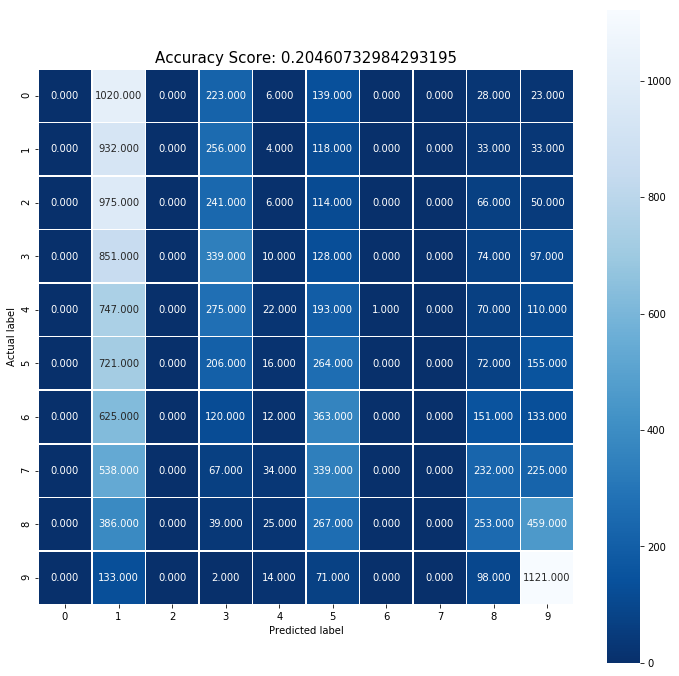

In [53]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predict_NN)
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)

plt.title(all_sample_title, size = 15);
plt.show()